#### Task 3 weather analysis related with flights

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df_airports = pd.read_csv("/Users/hugo/Library/CloudStorage/OneDrive-Personal/DATA_Science/Bootcamp/W7/mid-term-project-I/data/raw/airportsFlightsTable.csv")

In [80]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   airport_id  376 non-null    int64 
 1   iata_code   376 non-null    object
 2   city        376 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.9+ KB


In [81]:
df_airports

,airport_id,iata_code,city
0,10135,ABE,"Allentown/Bethlehem/Easton, PA"
1,10136,ABI,"Abilene, TX"
2,10140,ABQ,"Albuquerque, NM"
3,10141,ABR,"Aberdeen, SD"
4,10146,ABY,"Albany, GA"
...,...,...,...
371,15991,YAK,"Yakutat, AK"
372,16101,YKM,"Yakima, WA"
373,16133,YNG,"Youngstown/Warren, OH"
374,16218,YUM,"Yuma, AZ"


In [82]:
#Got airports from https://ourairports.com/airports.html
global_airports = pd.read_csv("/Users/hugo/Library/CloudStorage/OneDrive-Personal/DATA_Science/Bootcamp/W7/mid-term-project-I/data/raw/worldAirports.csv")

In [83]:
global_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35489 entries, 0 to 35488
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 35489 non-null  int64  
 1   ident              35489 non-null  object 
 2   type               35489 non-null  object 
 3   name               35489 non-null  object 
 4   latitude_deg       35489 non-null  float64
 5   longitude_deg      35489 non-null  float64
 6   elevation_ft       30858 non-null  float64
 7   continent          19757 non-null  object 
 8   country_name       35489 non-null  object 
 9   iso_country        35287 non-null  object 
 10  region_name        35489 non-null  object 
 11  iso_region         35489 non-null  object 
 12  local_region       35485 non-null  object 
 13  municipality       31489 non-null  object 
 14  scheduled_service  35489 non-null  int64  
 15  gps_code           23908 non-null  object 
 16  iata_code          802

In [84]:
df_global_airports = global_airports[['ident','iata_code','latitude_deg','longitude_deg']]
df_global_airports

,ident,iata_code,latitude_deg,longitude_deg
0,EGLL,LHR,51.470600,-0.461941
1,KLAX,LAX,33.942501,-118.407997
2,KORD,ORD,41.978600,-87.904800
3,KJFK,JFK,40.639447,-73.779317
4,KATL,ATL,33.636700,-84.428101
...,...,...,...,...
35484,CMB7,NaN,45.253000,-74.807000
35485,12CN,NaN,39.268306,-122.116689
35486,8CL6,NaN,39.288502,-122.189003
35487,0ID2,NaN,44.442902,-113.773003


In [85]:
#add latitude and longitude to my airports dataset

df_airports_merged = df_airports.merge(df_global_airports, on = 'iata_code', how = 'inner' )
df_airports_merged = df_airports_merged.drop(columns=['city','ident'])
df_airports_merged

,airport_id,iata_code,latitude_deg,longitude_deg
0,10135,ABE,40.651773,-75.442797
1,10136,ABI,32.411301,-99.681900
2,10140,ABQ,35.040199,-106.609001
3,10141,ABR,45.449100,-98.421799
4,10146,ABY,31.532946,-84.196215
...,...,...,...,...
369,15991,YAK,59.508717,-139.660435
370,16101,YKM,46.568199,-120.543999
371,16133,YNG,41.260700,-80.679100
372,16218,YUM,32.656601,-114.606003


In [86]:
df_flights_imp = pd.read_csv("/Users/hugo/Library/CloudStorage/OneDrive-Personal/DATA_Science/Bootcamp/W7/mid-term-project-I/data/raw/flightsWeatherSample_w.csv")
df_flights_sample = df_flights_imp#[['fl_date','mkt_unique_carrier','mkt_carrier_fl_num','tail_num','origin','dest','weather_delay_r']]
df_flights_sample

,fl_date,mkt_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,weather_delay_r
0,2019-03-21,DL,N390CA,6248,13296,MHT,"Manchester, NH",11433,DTW,"Detroit, MI",2900
1,2018-07-05,DL,N264SY,4690,11057,CLT,"Charlotte, NC",12478,JFK,"New York, NY",2692
2,2018-02-09,HA,N382HA,465,12173,HNL,"Honolulu, HI",14222,PPG,"Pago Pago, TT",2475
3,2018-12-09,DL,N921EV,3855,15323,TRI,"Bristol/Johnson City/Kingsport, TN",10397,ATL,"Atlanta, GA",2098
4,2019-12-24,AA,N902EV,3115,10874,CAK,"Akron, OH",13930,ORD,"Chicago, IL",1847
...,...,...,...,...,...,...,...,...,...,...,...
195,2018-12-26,AA,N950LR,5849,13851,OKC,"Oklahoma City, OK",11298,DFW,"Dallas/Fort Worth, TX",1103
196,2019-03-09,UA,N88325,6017,12266,IAH,"Houston, TX",12992,LIT,"Little Rock, AR",1103
197,2019-05-11,UA,N24103,4142,14193,PNS,"Pensacola, FL",12266,IAH,"Houston, TX",1102
198,2018-05-15,DL,N380DA,2164,12478,JFK,"New York, NY",14683,SAT,"San Antonio, TX",1100


In [87]:
df_flights_sample.rename(columns={'origin': 'iata_code','dest': 'iata_code2'}, inplace=True)
##df_flights_sample.rename(columns={}, inplace = True)
df_flights_sample['fl_date'] = df_flights_sample['fl_date'].astype('datetime64')
df_flights_sample[['city','state']] = df_flights_sample['origin_city_name'].str.split(', ', expand=True)
df_flights_sample.drop(columns=['origin_city_name', 'dest_city_name'], inplace=True)
df_flights_sample#.info()

,fl_date,mkt_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,iata_code,dest_airport_id,iata_code2,weather_delay_r,city,state
0,2019-03-21,DL,N390CA,6248,13296,MHT,11433,DTW,2900,Manchester,NH
1,2018-07-05,DL,N264SY,4690,11057,CLT,12478,JFK,2692,Charlotte,NC
2,2018-02-09,HA,N382HA,465,12173,HNL,14222,PPG,2475,Honolulu,HI
3,2018-12-09,DL,N921EV,3855,15323,TRI,10397,ATL,2098,Bristol/Johnson City/Kingsport,TN
4,2019-12-24,AA,N902EV,3115,10874,CAK,13930,ORD,1847,Akron,OH
...,...,...,...,...,...,...,...,...,...,...,...
195,2018-12-26,AA,N950LR,5849,13851,OKC,11298,DFW,1103,Oklahoma City,OK
196,2019-03-09,UA,N88325,6017,12266,IAH,12992,LIT,1103,Houston,TX
197,2019-05-11,UA,N24103,4142,14193,PNS,12266,IAH,1102,Pensacola,FL
198,2018-05-15,DL,N380DA,2164,12478,JFK,14683,SAT,1100,New York,NY


In [88]:
df_flights_merged = df_flights_sample.merge(df_airports_merged, on='iata_code', how='left')
df_flights_merged.rename(columns={'latitude_deg':'lat','longitude_deg':'lon'},inplace= True)

In [89]:
df_flights_merged

,fl_date,mkt_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,iata_code,dest_airport_id,iata_code2,weather_delay_r,city,state,airport_id,lat,lon
0,2019-03-21,DL,N390CA,6248,13296,MHT,11433,DTW,2900,Manchester,NH,13296,42.932598,-71.435699
1,2018-07-05,DL,N264SY,4690,11057,CLT,12478,JFK,2692,Charlotte,NC,11057,35.214001,-80.943100
2,2018-02-09,HA,N382HA,465,12173,HNL,14222,PPG,2475,Honolulu,HI,12173,21.320620,-157.924228
3,2018-12-09,DL,N921EV,3855,15323,TRI,10397,ATL,2098,Bristol/Johnson City/Kingsport,TN,15323,36.475201,-82.407401
4,2019-12-24,AA,N902EV,3115,10874,CAK,13930,ORD,1847,Akron,OH,10874,40.916100,-81.442200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2018-12-26,AA,N950LR,5849,13851,OKC,11298,DFW,1103,Oklahoma City,OK,13851,35.393101,-97.600700
196,2019-03-09,UA,N88325,6017,12266,IAH,12992,LIT,1103,Houston,TX,12266,29.984400,-95.341400
197,2019-05-11,UA,N24103,4142,14193,PNS,12266,IAH,1102,Pensacola,FL,14193,30.473400,-87.186600
198,2018-05-15,DL,N380DA,2164,12478,JFK,14683,SAT,1100,New York,NY,12478,40.639447,-73.779317


In [164]:
#Import meteostast library and datetime
from datetime import datetime
from meteostat import Point, Daily

start = datetime(2018, 1, 1) # Change start date
end = datetime(2019, 12, 31) # Change end date

In [166]:
#use weather library meteostat
#Be carefull this library is not availble all the time and generate connection errors
weather_dfs=[]
def get_bulk_weather(df):
    for i,r in df.iterrows():
        point = Point(r.lat, r.lon)
        data = Daily(point, start, end)#,params=['temp','prcp','wspd','tsun','snow'])
        data = data.fetch()
        data["lat"] = r.lat
        data["lon"] = r.lon
        weather_dfs.append(data)
        #print(data)
    weather_final = pd.concat(weather_dfs)
    return weather_final 

df_weather = get_bulk_weather(df_flights_merged)
df_weather

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,lat,lon
2018-01-01,-16.6,-21.1,-11.7,0.0,300.0,294.0,18.5,NaN,1024.9,NaN,42.932598,-71.435699
2018-01-02,-16.0,-26.1,-8.3,0.0,300.0,NaN,5.8,NaN,1024.1,NaN,42.932598,-71.435699
2018-01-03,-9.1,-16.1,-1.1,0.0,280.0,NaN,4.8,NaN,1024.3,NaN,42.932598,-71.435699
2018-01-04,-7.3,-15.6,-3.3,18.8,280.0,321.0,26.7,NaN,998.5,NaN,42.932598,-71.435699
2018-01-05,-11.2,-16.1,-6.1,0.0,530.0,279.0,23.2,NaN,NaN,NaN,42.932598,-71.435699
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,8.3,3.3,13.9,0.0,0.0,266.0,18.2,NaN,1020.6,NaN,42.212399,-83.353401
2019-12-28,3.0,1.1,6.1,0.0,0.0,NaN,8.6,NaN,1024.5,NaN,42.212399,-83.353401
2019-12-29,7.7,3.9,10.0,29.0,0.0,89.0,10.5,NaN,1010.1,NaN,42.212399,-83.353401
2019-12-30,5.5,1.7,9.4,1.4,0.0,218.0,28.8,NaN,997.8,NaN,42.212399,-83.353401


In [167]:
#Create local file to avoid issue with library
from pathlib import Path  
filepath = Path('/Users/hugo/Library/CloudStorage/OneDrive-Personal/DATA_Science/Bootcamp/W7/mid-term-project-I/data/raw/weatherSampleNew.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_weather.to_csv(filepath)  

In [199]:
df_weather_f= pd.read_csv("/Users/hugo/Library/CloudStorage/OneDrive-Personal/DATA_Science/Bootcamp/W7/mid-term-project-I/data/raw/weatherSample.csv")  


In [200]:
df_flights_merged['Key'] = df_flights_merged['lat'].astype(str) +'-'+df_flights_merged['lat'].astype(str) 
df_flights_merged

,fl_date,mkt_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,iata_code,dest_airport_id,iata_code2,weather_delay_r,city,state,airport_id,lat,lon,Key
0,2019-03-21,DL,N390CA,6248,13296,MHT,11433,DTW,2900,Manchester,NH,13296,42.932598,-71.435699,42.932598-42.932598
1,2018-07-05,DL,N264SY,4690,11057,CLT,12478,JFK,2692,Charlotte,NC,11057,35.214001,-80.943100,35.2140007019043-35.2140007019043
2,2018-02-09,HA,N382HA,465,12173,HNL,14222,PPG,2475,Honolulu,HI,12173,21.320620,-157.924228,21.32062-21.32062
3,2018-12-09,DL,N921EV,3855,15323,TRI,10397,ATL,2098,Bristol/Johnson City/Kingsport,TN,15323,36.475201,-82.407401,36.475201-36.475201
4,2019-12-24,AA,N902EV,3115,10874,CAK,13930,ORD,1847,Akron,OH,10874,40.916100,-81.442200,40.91609954833984-40.91609954833984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2018-12-26,AA,N950LR,5849,13851,OKC,11298,DFW,1103,Oklahoma City,OK,13851,35.393101,-97.600700,35.393101-35.393101
196,2019-03-09,UA,N88325,6017,12266,IAH,12992,LIT,1103,Houston,TX,12266,29.984400,-95.341400,29.984399795532227-29.984399795532227
197,2019-05-11,UA,N24103,4142,14193,PNS,12266,IAH,1102,Pensacola,FL,14193,30.473400,-87.186600,30.4734-30.4734
198,2018-05-15,DL,N380DA,2164,12478,JFK,14683,SAT,1100,New York,NY,12478,40.639447,-73.779317,40.639447-40.639447


In [201]:
df_weather_f['Key'] = df_weather_f['lat'].astype(str) +'-'+df_weather_f['lat'].astype(str)
df_weather_f = df_weather_f.drop(columns=['tmin','tmax','wdir','pres','wpgt','lat','lon','tsun']) 


In [202]:
df_weather_f.rename(columns={'Unnamed: 0' :'fl_date','tavg':'AvgTemp', 'prcp':'Precipitation', 'snow':'Snow_mm','wspd':'WindSpeed','tsun':'SunTime'}, inplace=True)
#df_weather.rename_axis('fl_date', inplace=True)
#df_weather.reset_index(inplace=True)
df_weather_f['fl_date'] = df_weather_f['fl_date'].astype('datetime64[ns]')
df_weather_f.drop_duplicates()
df_weather_f


,fl_date,AvgTemp,Precipitation,Snow_mm,WindSpeed,Key
0,2018-01-01,-16.6,0.0,300.0,18.5,42.932598-42.932598
1,2018-01-02,-16.0,0.0,300.0,5.8,42.932598-42.932598
2,2018-01-03,-9.1,0.0,280.0,4.8,42.932598-42.932598
3,2018-01-04,-7.3,18.8,280.0,26.7,42.932598-42.932598
4,2018-01-05,-11.2,0.0,530.0,23.2,42.932598-42.932598
...,...,...,...,...,...,...
143032,2019-12-27,8.3,0.0,0.0,18.2,42.212398529052734-42.212398529052734
143033,2019-12-28,3.0,0.0,0.0,8.6,42.212398529052734-42.212398529052734
143034,2019-12-29,7.7,29.0,0.0,10.5,42.212398529052734-42.212398529052734
143035,2019-12-30,5.5,1.4,0.0,28.8,42.212398529052734-42.212398529052734


In [203]:
flights_weather_merge = df_flights_merged.merge(df_weather_f, on=['Key','fl_date'], how='left')
flights_weather_merge.fillna(0, inplace=True)
flights_weather_merge.drop_duplicates(inplace=True)
flights_weather_merge

,fl_date,mkt_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,iata_code,dest_airport_id,iata_code2,weather_delay_r,city,state,airport_id,lat,lon,Key,AvgTemp,Precipitation,Snow_mm,WindSpeed
0,2019-03-21,DL,N390CA,6248,13296,MHT,11433,DTW,2900,Manchester,NH,13296,42.932598,-71.435699,42.932598-42.932598,4.6,0.0,130.0,11.2
1,2018-07-05,DL,N264SY,4690,11057,CLT,12478,JFK,2692,Charlotte,NC,11057,35.214001,-80.943100,35.2140007019043-35.2140007019043,29.2,0.0,0.0,8.6
2,2018-02-09,HA,N382HA,465,12173,HNL,14222,PPG,2475,Honolulu,HI,12173,21.320620,-157.924228,21.32062-21.32062,21.6,0.0,0.0,13.7
4,2018-12-09,DL,N921EV,3855,15323,TRI,10397,ATL,2098,Bristol/Johnson City/Kingsport,TN,15323,36.475201,-82.407401,36.475201-36.475201,0.6,38.9,130.0,9.0
5,2019-12-24,AA,N902EV,3115,10874,CAK,13930,ORD,1847,Akron,OH,10874,40.916100,-81.442200,40.91609954833984-40.91609954833984,2.3,0.0,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2018-12-26,AA,N950LR,5849,13851,OKC,11298,DFW,1103,Oklahoma City,OK,13851,35.393101,-97.600700,35.393101-35.393101,12.8,69.1,0.0,29.2
585,2019-03-09,UA,N88325,6017,12266,IAH,12992,LIT,1103,Houston,TX,12266,29.984400,-95.341400,29.984399795532227-29.984399795532227,23.8,0.0,0.0,15.5
586,2019-05-11,UA,N24103,4142,14193,PNS,12266,IAH,1102,Pensacola,FL,14193,30.473400,-87.186600,30.4734-30.4734,25.5,0.8,0.0,15.5
587,2018-05-15,DL,N380DA,2164,12478,JFK,14683,SAT,1100,New York,NY,12478,40.639447,-73.779317,40.639447-40.639447,17.2,11.2,0.0,17.6


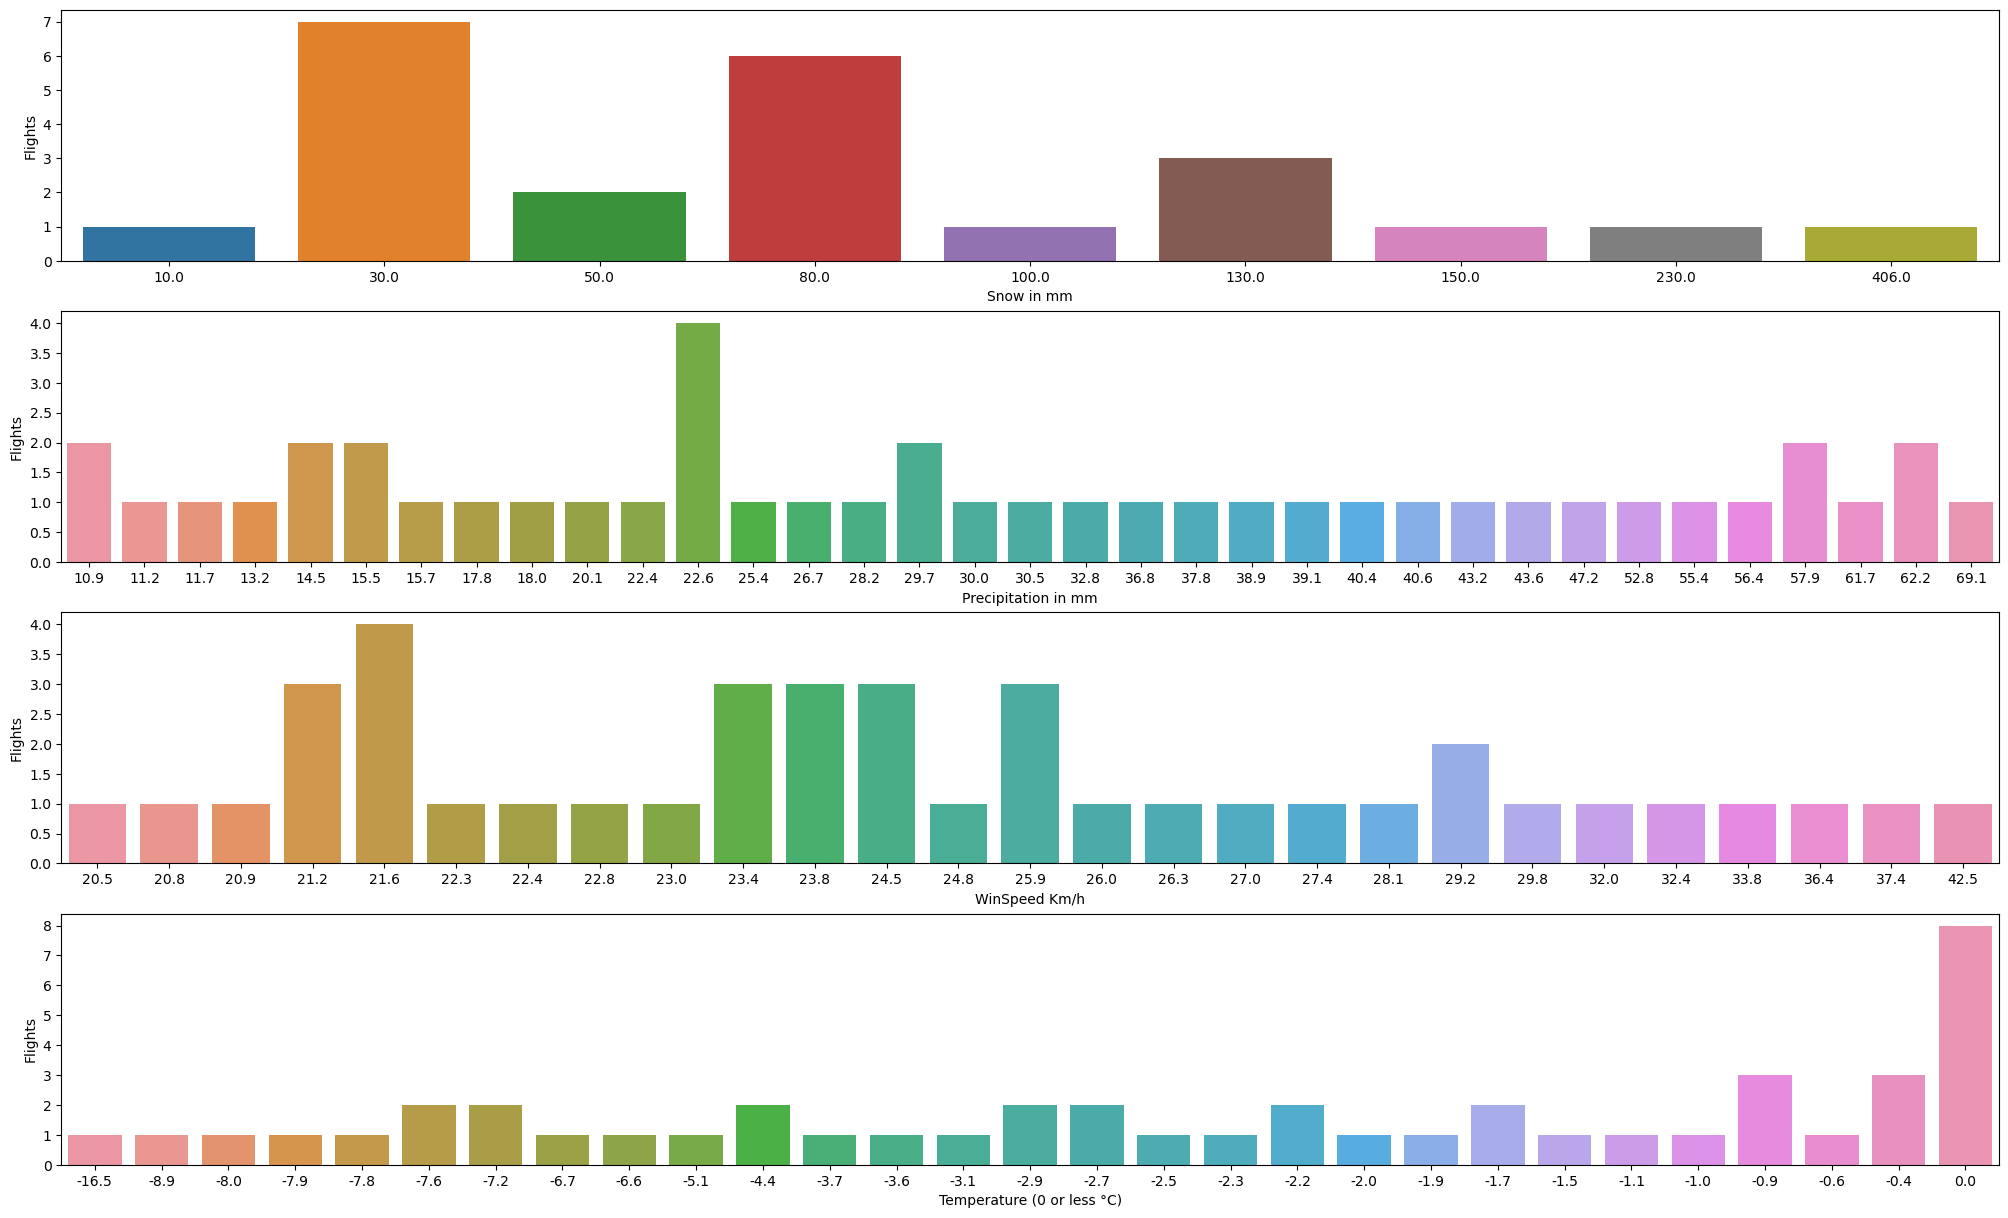

In [212]:
fig, ax = plt.subplots(4, 1, figsize=(25, 15))#, sharey=True)


sns.countplot(x='Snow_mm', data=flights_weather_merge[flights_weather_merge['Snow_mm']>0], ax=ax[0])
ax[0].set(xlabel='Snow in mm', ylabel='Flights')


sns.countplot(x='Precipitation', data=flights_weather_merge[flights_weather_merge['Precipitation']>10], ax=ax[1])
ax[1].set(xlabel='Precipitation in mm', ylabel='Flights')

sns.countplot(x='WindSpeed', data=flights_weather_merge[flights_weather_merge['WindSpeed']>20], ax=ax[2])
ax[2].set(xlabel='WinSpeed Km/h', ylabel='Flights')
#For the wind speed I used the minimun that is considered to affect an airplane. Close to 50Km/h is dangerous and could cause the plane to delay landing or departure.
#https://www.skyscanner.com/tips-and-inspiration/what-windspeed-delays-flights


sns.countplot(x='AvgTemp', data=flights_weather_merge[flights_weather_merge['AvgTemp']<=0], ax=ax[3])
ax[3].set(xlabel='Temperature (0 or less °C)', ylabel='Flights')

#sns.countplot(x='AvgTemp', data=flights_weather_merge[flights_weather_merge['AvgTemp']>=30], ax=ax[4])
#ax[4].set(xlabel='Temperature (Above 20 °C)', ylabel='Flights')
plt.show()
